In [1]:
%%html
<link rel="stylesheet" type="text/css" href="rise.css" />

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('bmh')
plt.rcParams['lines.markeredgecolor'] = 'w'
plt.rcParams['lines.markeredgewidth'] = 0.5
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['axes.labelsize'] = 14

# Polynomial Regression

**Learning goals**
- You will be able to fit a polynomial to {X0, X1, X2, ...} vs. Y data.
- You will be able to predict the Y value for new {X0, X1, X2, ...} values.
- You will understand how polynomial regression can be recast as a simple linear regression.

**Some experimental data: Temperature vs. Yield**

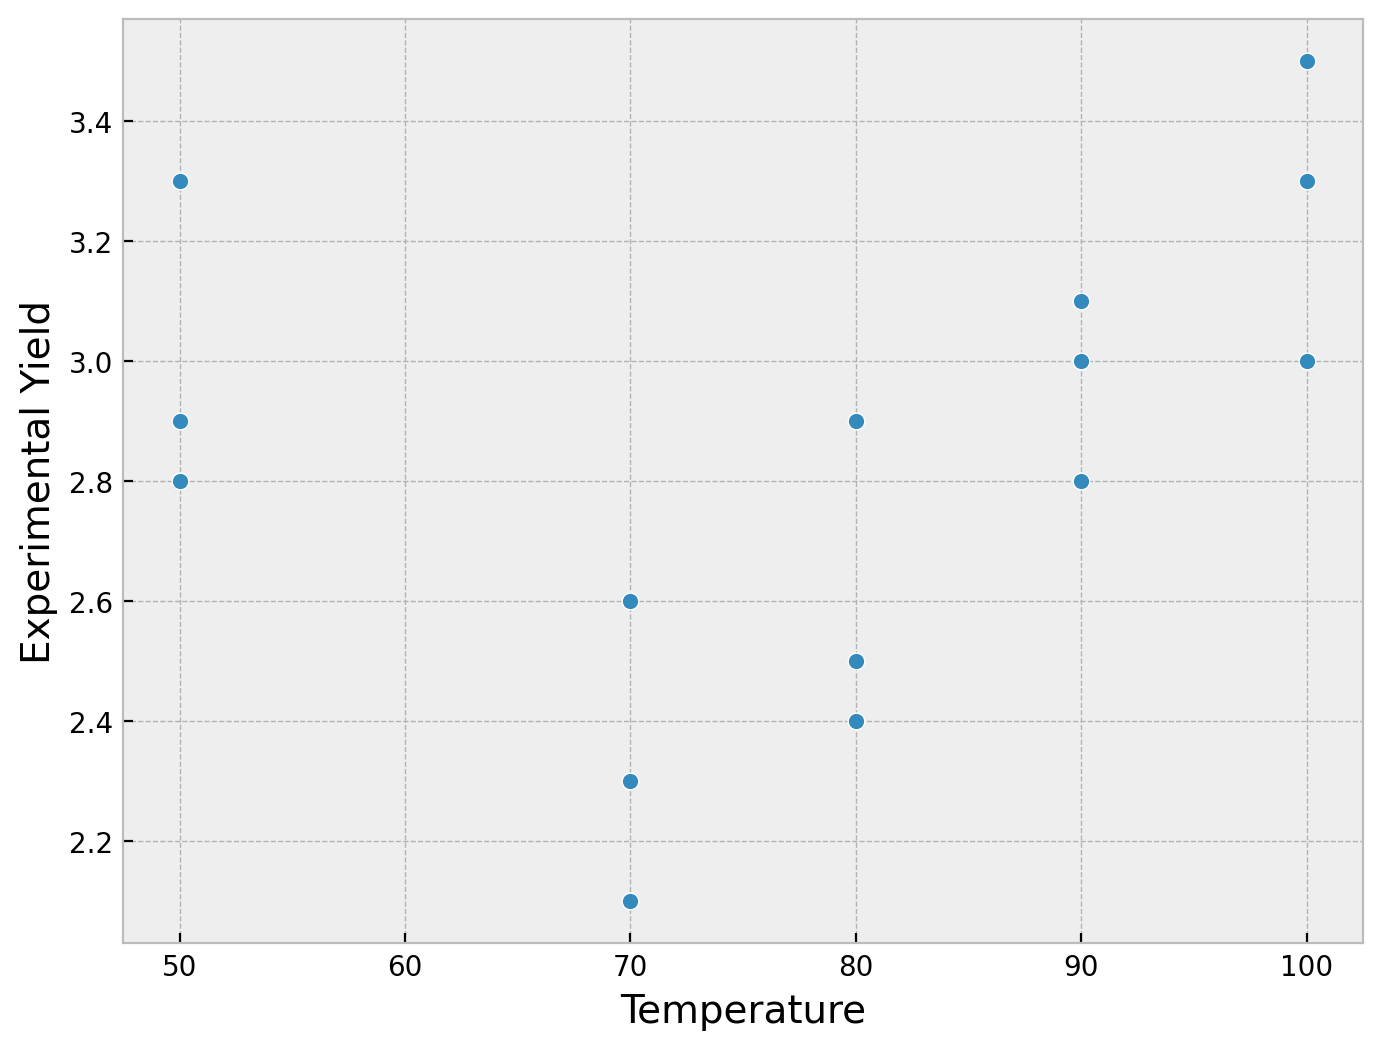

In [3]:
temperature = np.array([50, 50, 50, 70, 70, 70, 80, 80, 80, 90, 90, 90, 100, 100, 100])
experimental_yield = np.array([3.3, 2.8, 2.9, 2.3, 2.6, 2.1, 2.5, 2.9, 2.4, 3, 3.1, 2.8, 3.3, 3.5, 3])

plt.plot(temperature, experimental_yield, 'o')
plt.xlabel('Temperature')
plt.ylabel('Experimental Yield');

Rearranging the data for use with sklearn...

In [4]:
X = temperature.reshape([-1,1])
y = experimental_yield

X.shape, y.shape

((15, 1), (15,))

In [5]:
X, y

(array([[ 50],
        [ 50],
        [ 50],
        [ 70],
        [ 70],
        [ 70],
        [ 80],
        [ 80],
        [ 80],
        [ 90],
        [ 90],
        [ 90],
        [100],
        [100],
        [100]]),
 array([3.3, 2.8, 2.9, 2.3, 2.6, 2.1, 2.5, 2.9, 2.4, 3. , 3.1, 2.8, 3.3,
        3.5, 3. ]))

# Exercise
Fit yield vs. temperature data with a linear model.

In [6]:
from sklearn.linear_model import LinearRegression

# 1. create model...
#lin_model = ...

# 2. fit model to data...
#...

# Exercise key
Fit yield vs. temperature data with a linear model.

In [7]:
from sklearn.linear_model import LinearRegression

# 1. create model...
lin_model = LinearRegression()

# 2. fit model to data...
lin_model.fit(X, y);

Plot linear fit over data.

In [8]:
temperatures = np.linspace(X.min(), X.max(), 3).reshape([-1,1])
yield_prediction = lin_model.predict(temperatures)

temperatures, yield_prediction

(array([[ 50.],
        [ 75.],
        [100.]]),
 array([2.64414414, 2.81306306, 2.98198198]))

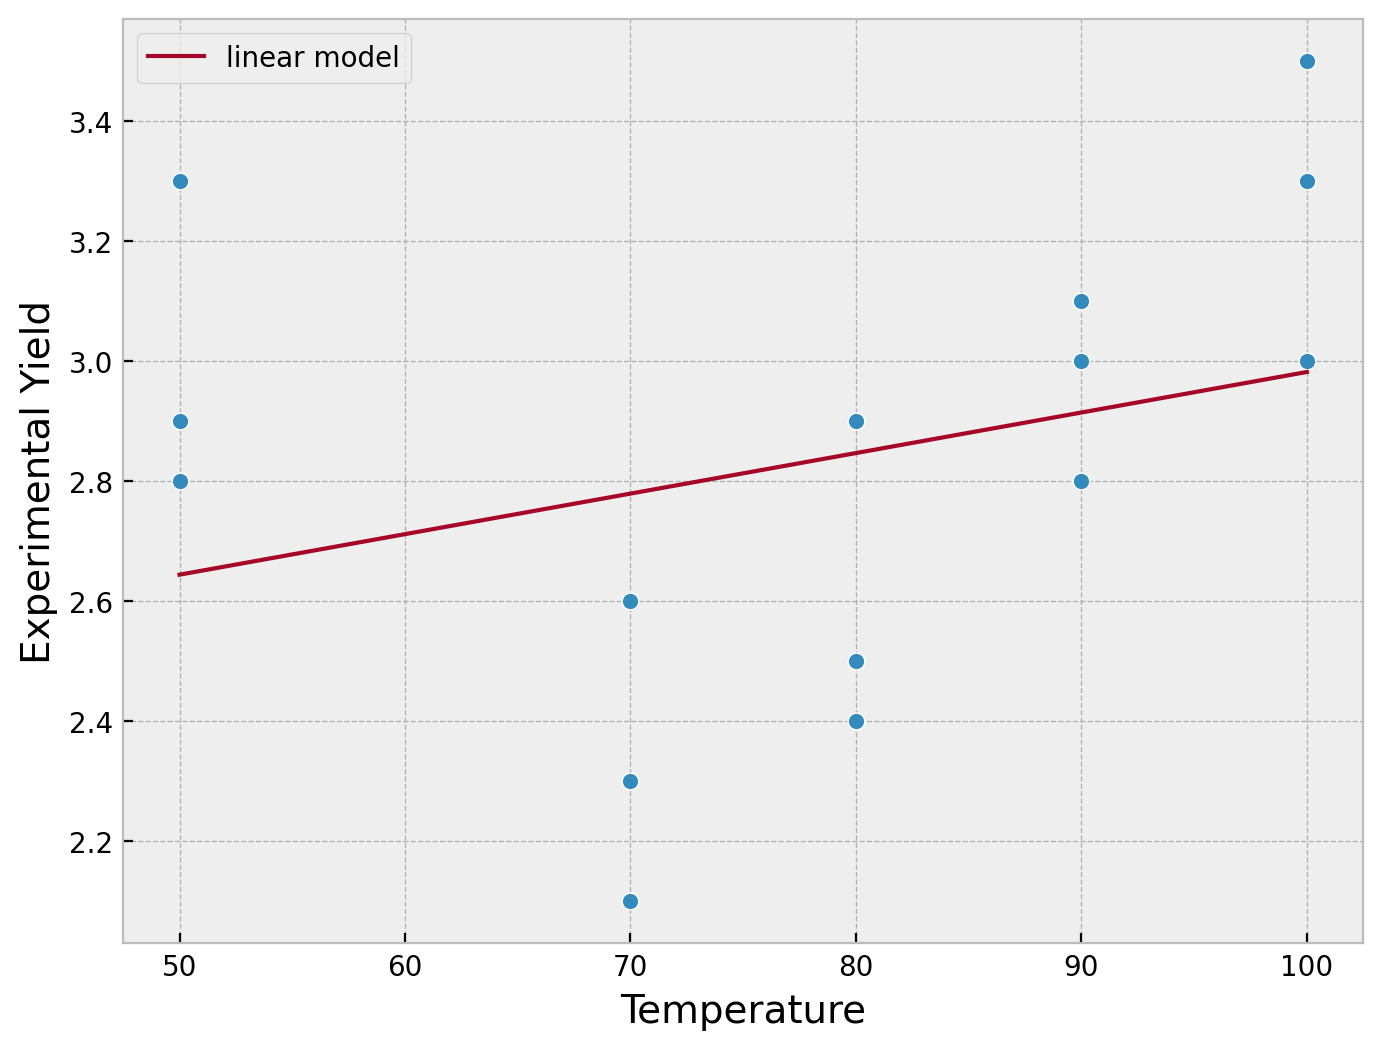

In [9]:
plt.plot(temperature, experimental_yield, 'o')
plt.plot(temperatures, yield_prediction, '-', label='linear model')
plt.xlabel('Temperature')
plt.ylabel('Experimental Yield')
plt.legend();

### A *tiny bit* of math...

A simple linear model for one feature variable $x$:

$\hat{y} = \beta_0 + \beta_1 x$

Extending this to a $3^{rd}$ degree polynomial model:

$\hat{y} = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3$

A simple linear model for two feature variables $x_1$ and $x_2$:

$\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2$

Extending this to a $2^{nd}$ degree polynomial model:

$\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1^2 + \beta_4 x_2^2 + \beta_5 x_1 x_2$

$x_1 x_2$ is an interaction term between $x_1$ and $x_2$

Reparameterize the model:

$\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1^2 + \beta_4 x_2^2 + \beta_5 x_1 x_2$

$\begin{matrix}
x_3 & \rightarrow & x_1^2 \\
x_4 & \rightarrow & x_2^2 \\
x_5 & \rightarrow & x_1 x_2
\end{matrix}$

$\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_4 + \beta_5 x_5$

**!!! But that's just a linear model**

Recall the matrix representation of the linear model for each set of feature variables $x_1, x_2, \dots, x_n$:

$\begin{bmatrix} \vdots \\ \hat{y} \\ \vdots \end{bmatrix} = \beta_0
+ \beta_1 \begin{bmatrix} \vdots \\ x_1 \\ \vdots \end{bmatrix}
+ \beta_2 \begin{bmatrix} \vdots \\ x_2 \\ \vdots \end{bmatrix}
+ \dots
+ \beta_n \begin{bmatrix} \vdots \\ x_n \\ \vdots \end{bmatrix}$


$X = 
\begin{bmatrix} 
\vdots & \vdots & & \vdots \\ 
x_1 & x_2 & \dots & x_n \\ 
\vdots & \vdots & & \vdots 
\end{bmatrix}$

Consider a dataset with two features $X$:

$X_{lin} = 
\begin{bmatrix} 
\vdots & \vdots \\ 
x_1 & x_2 \\ 
\vdots & \vdots
\end{bmatrix}$

All you need to do extend this to a polynomial model is to add a column for each higher order and interaction term:

$X_{poly} = 
\begin{bmatrix} 
\vdots & \vdots & \vdots & \vdots & \vdots \\ 
x_1 & x_2 & x_1^2 & x_2^2 & x_1 x_2 \\ 
\vdots & \vdots & \vdots & \vdots & \vdots 
\end{bmatrix}$

You can treat this exactly the same as a linear model with five features:

$X_{poly} = 
\begin{bmatrix} 
\vdots & \vdots & \vdots & \vdots & \vdots \\ 
x_1 & x_2 & x_3 & x_4 & x_5 \\ 
\vdots & \vdots & \vdots & \vdots & \vdots 
\end{bmatrix}$

where:

$\begin{matrix}
x_3 & \rightarrow & x_1^2 \\
x_4 & \rightarrow & x_2^2 \\
x_5 & \rightarrow & x_1 x_2
\end{matrix}$

Fit yield vs. temperature data with a $2^{nd}$ degree polynomial model...

In [10]:
Xpoly2 = np.hstack([X, X**2])

X, Xpoly2

(array([[ 50],
        [ 50],
        [ 50],
        [ 70],
        [ 70],
        [ 70],
        [ 80],
        [ 80],
        [ 80],
        [ 90],
        [ 90],
        [ 90],
        [100],
        [100],
        [100]]),
 array([[   50,  2500],
        [   50,  2500],
        [   50,  2500],
        [   70,  4900],
        [   70,  4900],
        [   70,  4900],
        [   80,  6400],
        [   80,  6400],
        [   80,  6400],
        [   90,  8100],
        [   90,  8100],
        [   90,  8100],
        [  100, 10000],
        [  100, 10000],
        [  100, 10000]]))

In [11]:
pd.DataFrame(Xpoly2, columns=[r'$x$', r'$x^2$'])

,$x$,$x^2$
0,50,2500
1,50,2500
2,50,2500
3,70,4900
4,70,4900
5,70,4900
6,80,6400
7,80,6400
8,80,6400
9,90,8100


In [12]:
from sklearn.preprocessing import PolynomialFeatures

# this can be used to convert linear features to polynomial features
to_poly2 = PolynomialFeatures(degree=2)

# convert from linear to degree 2 polynomial
Xpoly2 = to_poly2.fit_transform(X)

pd.DataFrame(Xpoly2, columns=['b', r'$x$', r'$x^2$'])

,b,$x$,$x^2$
0,1.0,50.0,2500.0
1,1.0,50.0,2500.0
2,1.0,50.0,2500.0
3,1.0,70.0,4900.0
4,1.0,70.0,4900.0
5,1.0,70.0,4900.0
6,1.0,80.0,6400.0
7,1.0,80.0,6400.0
8,1.0,80.0,6400.0
9,1.0,90.0,8100.0


A column of ones in the feature matrix represents a y-intercept.

However, the `LinearRegression` class already handles the y-intercept for us, so we don't want this.

In [13]:
to_poly2 = PolynomialFeatures(degree=2, include_bias=False)

Xpoly2 = to_poly2.fit_transform(X)

pd.DataFrame(Xpoly2, columns=[r'$x$', r'$x^2$'])

,$x$,$x^2$
0,50.0,2500.0
1,50.0,2500.0
2,50.0,2500.0
3,70.0,4900.0
4,70.0,4900.0
5,70.0,4900.0
6,80.0,6400.0
7,80.0,6400.0
8,80.0,6400.0
9,90.0,8100.0


The polynomial model is now just a linear model using your transformed features...

In [14]:
poly2_model = LinearRegression()
poly2_model.fit(Xpoly2, y)

print(poly2_model.intercept_)  # y-intercept
print(poly2_model.coef_)  # slopes for [x, x^2]

7.960481099656357
[-0.15371134  0.0010756 ]


The polynomial model prediction of yield vs. temperature...

Remember that any temperature values you want to make a prediction for need to be transformed in exactly the same way as you transformed the data to which the model was fit.

In [15]:
temperatures = np.linspace(X.min(), X.max(), 100).reshape([-1,1])
poly2_temperatures = to_poly2.fit_transform(temperatures)

lin_yield_prediction = lin_model.predict(temperatures)
poly2_yield_prediction = poly2_model.predict(poly2_temperatures)

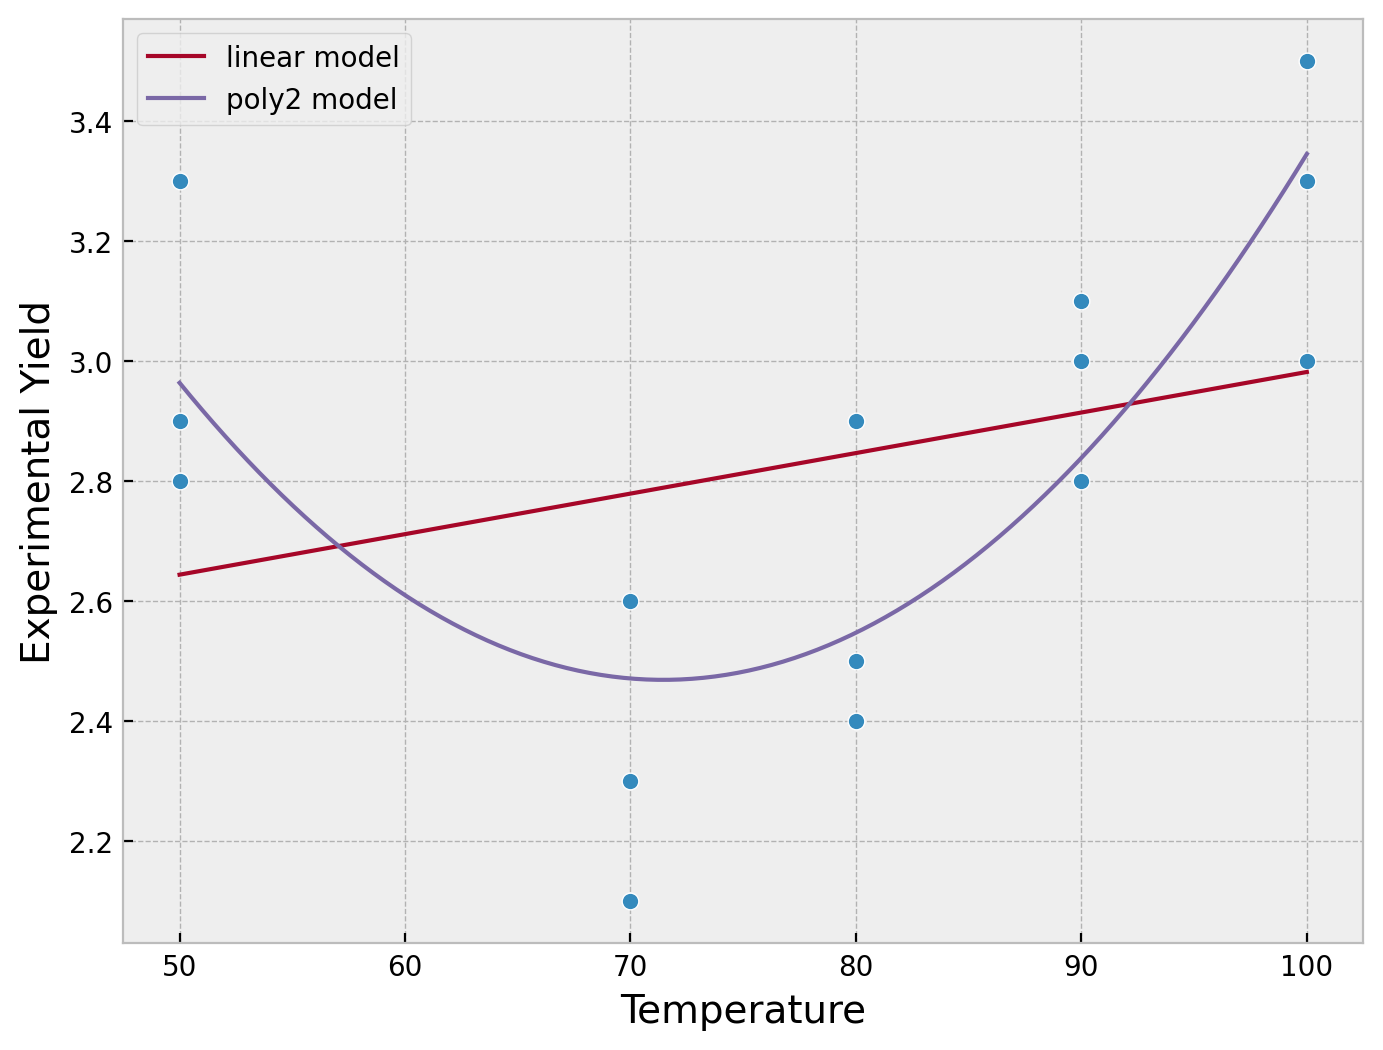

In [16]:
# fit lines
plt.plot(temperature, experimental_yield, 'o')
plt.plot(temperatures, lin_yield_prediction, '-', label='linear model')
plt.plot(temperatures, poly2_yield_prediction, '-', label='poly2 model')
plt.xlabel('Temperature')
plt.ylabel('Experimental Yield')
plt.legend();

Residuals can also tell us a lot.

In [17]:
lin_residuals = y - lin_model.predict(X)
poly2_residuals = y - poly2_model.predict(Xpoly2)

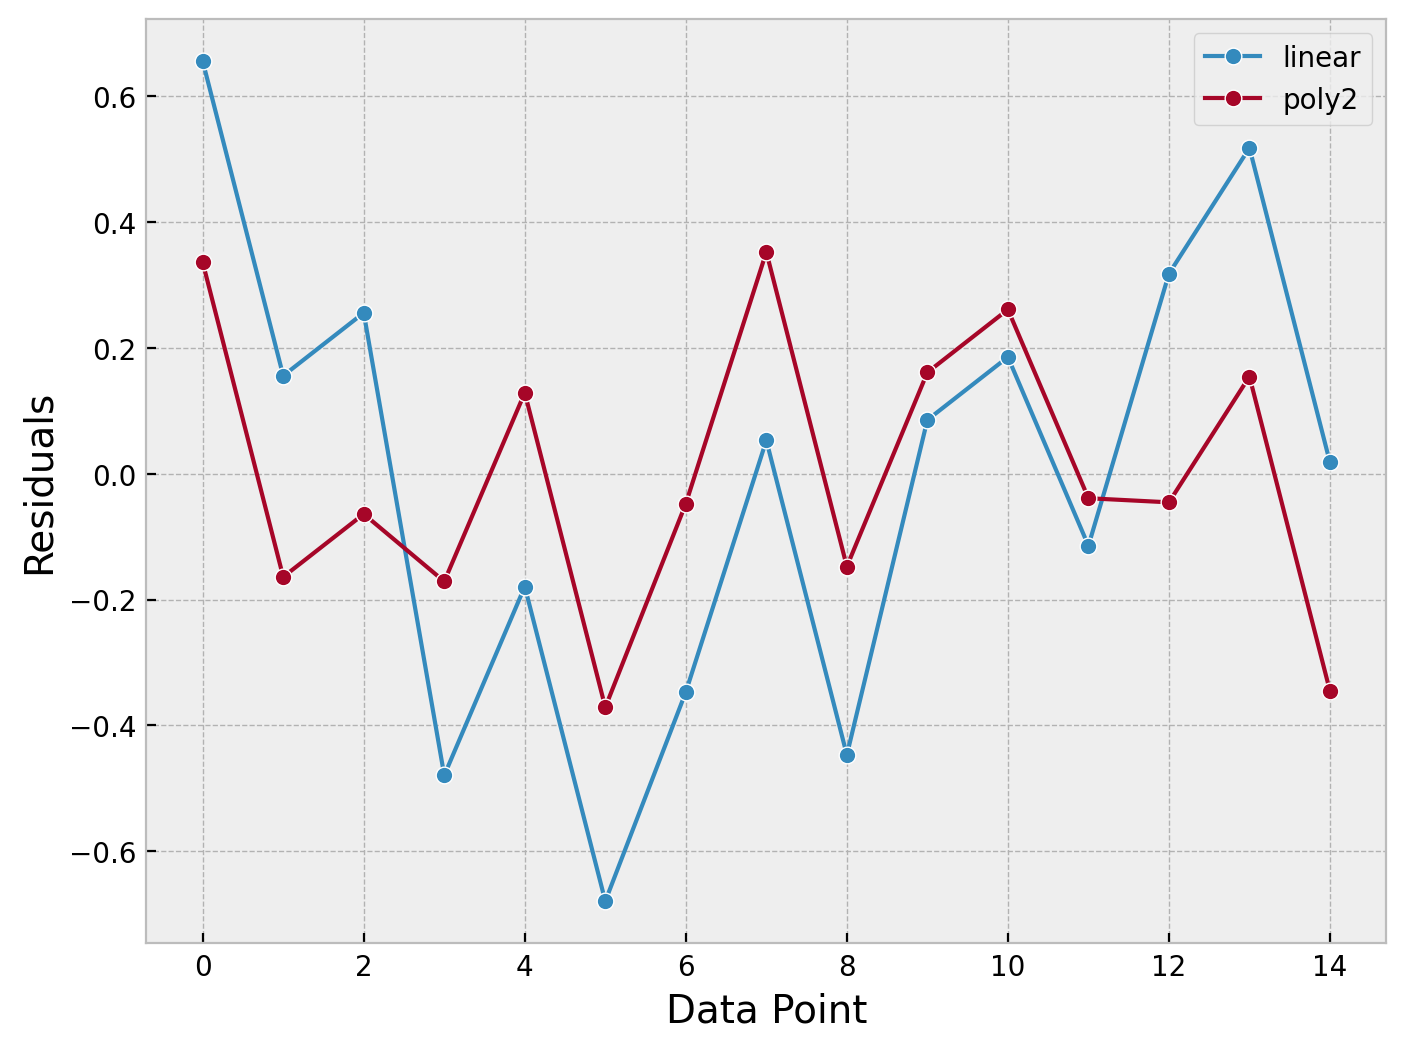

In [18]:
plt.plot(lin_residuals, 'o-', label='linear')
plt.plot(poly2_residuals, 'o-', label='poly2')
plt.xlabel('Data Point')
plt.ylabel('Residuals')
plt.legend();

Here are two options for quantitatively comparing models.

Mean squared error (MSE)...

In [19]:
lin_MSE = np.mean(lin_residuals**2)
poly2_MSE = np.mean(poly2_residuals**2)

$R^2$...

In [20]:
lin_R2 = lin_model.score(X, y)
poly2_R2 = poly2_model.score(Xpoly2, y)

Summarize MSE and $R^2$ for linear and polynomial models in a table.

In [21]:
pd.DataFrame([[lin_MSE, poly2_MSE], 
              [lin_R2, poly2_R2]], 
             columns=['linear', 'poly2'], 
             index=['MSE', 'R^2'])

,linear,poly2
MSE,0.132709,0.047785
R^2,0.092418,0.673205


Fit yield vs. temperature data with a $3^{rd}$ degree polynomial model...

In [22]:
to_poly3 = PolynomialFeatures(degree=3, include_bias=False)

Xpoly3 = to_poly3.fit_transform(X)

pd.DataFrame(Xpoly3, columns=['x', 'x^2', 'x^3'])

,x,x^2,x^3
0,50.0,2500.0,125000.0
1,50.0,2500.0,125000.0
2,50.0,2500.0,125000.0
3,70.0,4900.0,343000.0
4,70.0,4900.0,343000.0
5,70.0,4900.0,343000.0
6,80.0,6400.0,512000.0
7,80.0,6400.0,512000.0
8,80.0,6400.0,512000.0
9,90.0,8100.0,729000.0


The polynomial model is now just a linear model using your transformed features...

In [23]:
poly3_model = LinearRegression()
poly3_model.fit(Xpoly3, y)

print(poly3_model.intercept_)  # y-intercept
print(poly3_model.coef_)  # slopes for [x, x^2, x^3]

21.051572327041466
[-7.14287212e-01  8.76572327e-03 -3.40146751e-05]


Polynomial fit curve...

In [24]:
# MUST convert to polynomial feature before we feed these to the model
poly3_temperatures = to_poly3.fit_transform(temperatures)

poly3_yield_prediction = poly3_model.predict(poly3_temperatures)

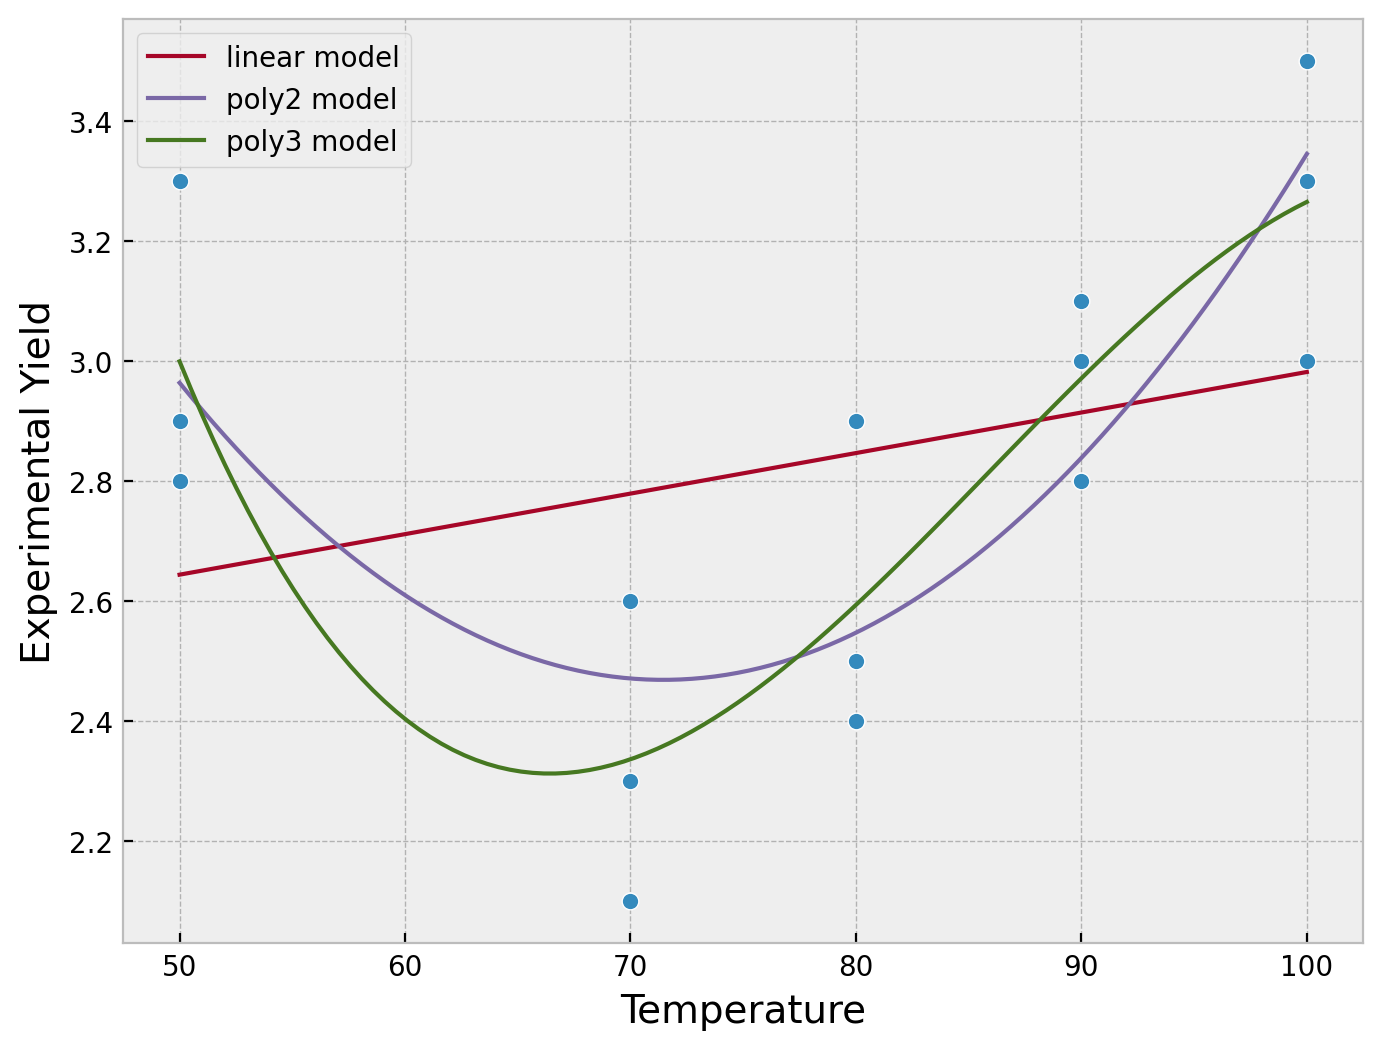

In [25]:
# fit lines
plt.plot(temperature, experimental_yield, 'o')
plt.plot(temperatures, lin_yield_prediction, '-', label='linear model')
plt.plot(temperatures, poly2_yield_prediction, '-', label='poly2 model')
plt.plot(temperatures, poly3_yield_prediction, '-', label='poly3 model')
plt.xlabel('Temperature')
plt.ylabel('Experimental Yield')
plt.legend();

Compare models.

In [26]:
poly3_residuals = y - poly3_model.predict(Xpoly3)

poly3_MSE = np.mean(poly3_residuals**2)

poly3_R2 = poly3_model.score(Xpoly3, y)

pd.DataFrame([[lin_MSE, poly2_MSE, poly3_MSE], 
              [lin_R2, poly2_R2, poly3_R2]], 
             columns=['linear', 'poly2', 'poly3'], 
             index=['MSE', 'R^2'])

,linear,poly2,poly3
MSE,0.132709,0.047785,0.038681
R^2,0.092418,0.673205,0.735462


# Exercise

In [27]:
# for converting from linear to degree 4 polynomial features
#to_poly4 = ...

# degree 4 polynomial features
#Xpoly4 = ...

# degree 4 polynomial model
#poly4_model = ...

# fit model
#...

# residuals
#residuals = ...

# MSE
#poly4_MSE = ...

# R^2
#poly4_R2 = ...

# Exercise key

In [28]:
# for converting from linear to degree 4 polynomial features
to_poly4 = PolynomialFeatures(degree=4, include_bias=False)

# degree 4 polynomial features
Xpoly4 = to_poly4.fit_transform(X)

# degree 4 polynomial model
poly4_model = LinearRegression()

# fit model
poly4_model.fit(Xpoly4, y)

# residuals
residuals = y - poly4_model.predict(Xpoly4)

# MSE
poly4_MSE = np.mean(residuals**2)

# R^2
poly4_R2 = poly4_model.score(Xpoly4, y)

In [29]:
poly4_temperatures = to_poly4.fit_transform(temperatures)
poly4_yield_prediction = poly4_model.predict(poly4_temperatures)

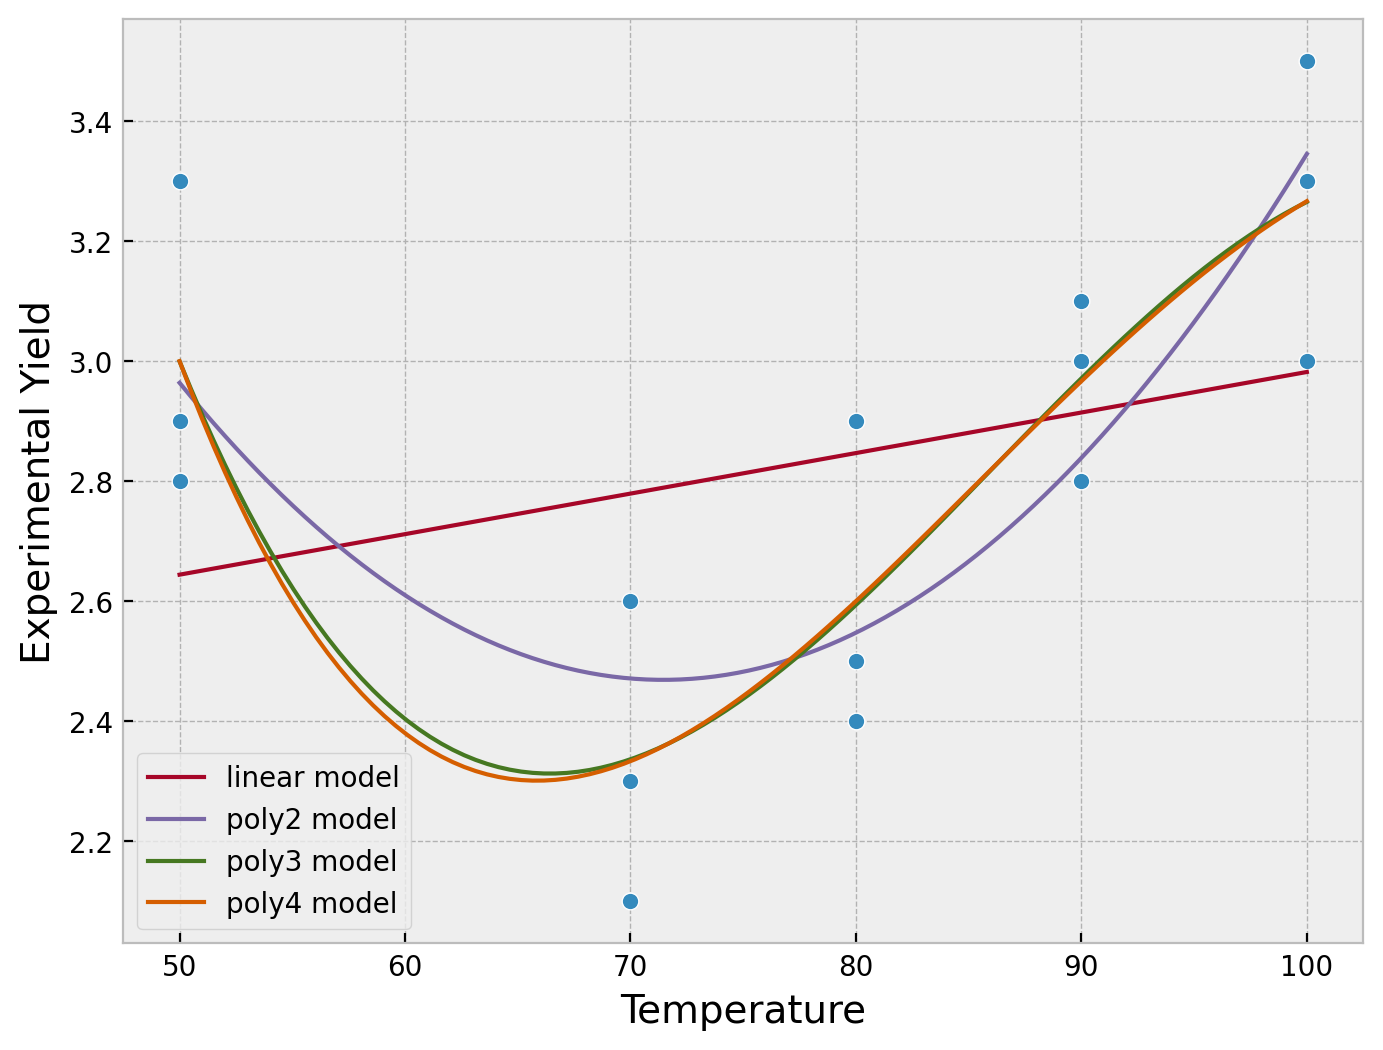

In [30]:
plt.plot(temperature, experimental_yield, 'o')
plt.plot(temperatures, lin_yield_prediction, '-', label='linear model')
plt.plot(temperatures, poly2_yield_prediction, '-', label='poly2 model')
plt.plot(temperatures, poly3_yield_prediction, '-', label='poly3 model')
plt.plot(temperatures, poly4_yield_prediction, '-', label='poly4 model')
plt.xlabel('Temperature')
plt.ylabel('Experimental Yield')
plt.legend();

In [31]:
pd.DataFrame([[lin_MSE, poly2_MSE, poly3_MSE, poly4_MSE], 
              [lin_R2, poly2_R2, poly3_R2, poly4_R2]], 
             columns=['linear', 'poly2', 'poly3', 'poly4'], 
             index=['MSE', 'R^2'])

,linear,poly2,poly3,poly4
MSE,0.132709,0.047785,0.038681,0.038667
R^2,0.092418,0.673205,0.735462,0.735562


Polynomial fit is clearly better than a linear fit, but which degree polynomial should we use?

The $4^{th}$ degree model has a slightly better $MSE$ and $R^2$ than the $3^{rd}$ degree model, but is it worth the extra model complexity?

The $3^{rd}$ degree model has a better $MSE$ and $R^2$ than the $2^{nd}$ degree model, but is it overfitting noise in the data?

This is a question of model selection. Which of the models that we tried is the best?

We'll cover this next lecture.